Exercise 1 - generated quantities

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



      lp__  accept_stat__    lambda  y_sim[1]  y_sim[2]  y_sim[3]  y_sim[4]  \
0      0.0            0.0   71.0222      73.0      67.0      74.0      58.0   
1      0.0            0.0   78.5103      72.0      61.0      73.0      75.0   
2      0.0            0.0  258.5390     268.0     237.0     261.0     279.0   
3      0.0            0.0  105.2300      92.0     130.0     101.0      97.0   
4      0.0            0.0  186.2120     175.0     197.0     178.0     186.0   
...    ...            ...       ...       ...       ...       ...       ...   
3995   0.0            0.0   14.2617      13.0      19.0      19.0      11.0   
3996   0.0            0.0   19.3037      20.0      22.0      12.0      26.0   
3997   0.0            0.0  272.8840     261.0     275.0     291.0     268.0   
3998   0.0            0.0  181.4990     187.0     162.0     194.0     195.0   
3999   0.0            0.0   24.9128      28.0      21.0      32.0      29.0   

      y_sim[5]  y_sim[6]  
0         80.0      69.

C:\Users\xyz\AppData\Local\Temp\ipykernel_1420\3283702604.py:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  y_sims = df.drop(df.columns[:3], 1)


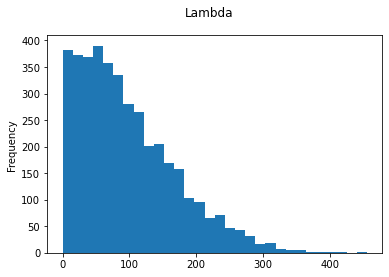

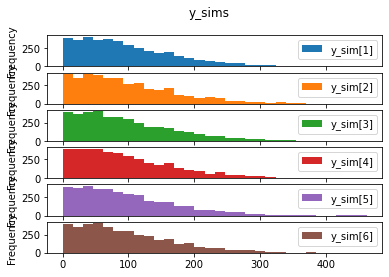

In [2]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Compile code_1.stan and sample from it using M=F

F = len("Maciej")
L = len("Brudzisz")

data = {
    "M": F
}

model = CmdStanModel(stan_file="code_1.stan")

fit = model.sample(data=data)

# 2. Create a pandas dataframe from resulting draws
df = fit.draws_pd()

print(df)

# 3. Plot a histogram for each of y_sim and lambda
Lambda = df['lambda']
Lambda.plot.hist(bins=30)
plt.suptitle("Lambda")

y_sims = df.drop(df.columns[:3], 1)
y_sims.plot.hist(subplots=True, bins=30)
plt.suptitle("y_sims")

plt.show()

Excercise 2 - constraints on the data

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



         lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -5.21469       0.954424    0.880042          1.0           1.0   
1    -4.98882       1.000000    0.880042          1.0           1.0   
2    -4.80364       1.000000    0.880042          2.0           3.0   
3    -4.81948       0.833662    0.880042          2.0           3.0   
4    -4.81948       0.859867    0.880042          1.0           3.0   
...       ...            ...         ...          ...           ...   
3995 -7.67282       0.613829    1.051480          2.0           3.0   
3996 -7.69514       0.996081    1.051480          1.0           1.0   
3997 -5.03680       1.000000    1.051480          2.0           3.0   
3998 -5.08994       0.986202    1.051480          1.0           1.0   
3999 -4.99565       1.000000    1.051480          1.0           1.0   

      divergent__  energy__     theta  
0             0.0   5.22955  0.734843  
1             0.0   5.17632  0.687657  
2             0.0   4.9472

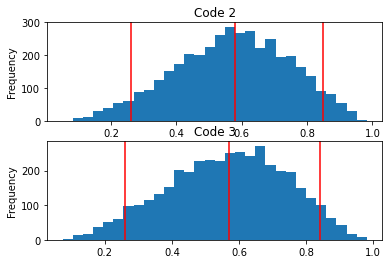

Code 2:
5%: 0.26
50%: 0.58
95%: 0.85

Code 3:
5%: 0.26
50%: 0.57
95%: 0.84


In [20]:
# 1. Observe how constraints on data behave for code_2 and code_3
model1 = CmdStanModel(stan_file="code_2.stan")
model2 = CmdStanModel(stan_file="code_3.stan")

data = {
    "N": 5,
    "y": [0,1,1,0,1]
}

fit1 = model1.sample(data)
fit2 = model2.sample(data)

df1 = fit1.draws_pd()
df2 = fit2.draws_pd()

print(df1)
print(df2)

summary1 = fit1.summary()
summary2 = fit2.summary()

plt.subplot(2, 1, 1)
df1["theta"].plot.hist(bins=30)
plt.title("Code 2")
plt.axvline(summary1["5%"]["theta"],color='r')
plt.axvline(summary1["50%"]["theta"],color='r')
plt.axvline(summary1["95%"]["theta"],color='r')

plt.subplot(2,1,2)
df2["theta"].plot.hist(bins=30)
plt.title("Code 3")
plt.axvline(summary2["5%"]["theta"],color='r')
plt.axvline(summary2["50%"]["theta"],color='r')
plt.axvline(summary2["95%"]["theta"],color='r')
plt.show()

print("Code 2:\n5%: " + str(summary1["5%"]["theta"]) + "\n50%: " + str(summary1["50%"]["theta"]) + "\n95%: " + str(summary1["95%"]["theta"]))
print("\nCode 3:\n5%: " + str(summary2["5%"]["theta"]) + "\n50%: " + str(summary2["50%"]["theta"]) + "\n95%: " + str(summary2["95%"]["theta"]))



Excercise 3 - constraints on the parameters

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



DF1: 
          lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -1.163530       0.306684    0.330802          1.0           2.0   
1    -1.570840       0.665128    0.330802          1.0           3.0   
2    -2.237130       0.665208    0.330802          1.0           3.0   
3    -1.369710       0.999998    0.330802          3.0           7.0   
4    -1.091240       0.999325    0.330802          1.0           3.0   
...        ...            ...         ...          ...           ...   
3995 -1.042000       0.666667    0.446859          1.0           3.0   
3996 -0.729674       0.500000    0.446859          1.0           2.0   
3997 -0.714386       1.000000    0.446859          1.0           1.0   
3998 -1.429660       0.966685    0.446859          2.0           5.0   
3999 -2.341020       0.995162    0.446859          2.0           5.0   

      divergent__  energy__     theta  
0             1.0  3.373730  0.912515  
1             1.0  2.015150  1.310800  
2       

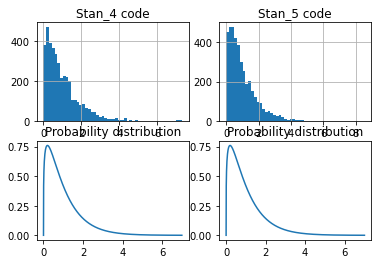

In [23]:
# from cmdstanpy import CmdStanModel
# import matplotlib.pyplot as plt
from scipy.stats import gamma
# import numpy as np

# 1. Constraints in parameters behave more subtely. We are infering theta without data from its prior.
# 2. Please see diagnostic messages from code_4 and how samples from it compare to the probability distribution.
# 3. Verify what changes if constraints are added as in code_5

model1 = CmdStanModel(stan_file="code_4.stan")
model2 = CmdStanModel(stan_file="code_5.stan")

fit1 = model1.sample()
fit2 = model2.sample()

df1 = fit1.draws_pd()
df2 = fit2.draws_pd()

print("DF1: ")
print(df1)

print("DF2: ")
print(df2)

print("DIAGNOSE FIT 1:" )
print(fit1.diagnose())

print("DIAGNOSE FIT 2:" )
print(fit2.diagnose())


#Probability density function
x = np.linspace(0,7,1000)
#a = alpha; scale = 1/beta
y = gamma.pdf(x, a=1.25, scale=1/1.25)


plt.subplot(2,2,3)
plt.plot(x, y)
plt.title("Probability distribution")

plt.subplot(2,2,1)
df1["theta"].hist(bins=50)
plt.xlim = 7
plt.title("Stan_4 code")

plt.subplot(2,2,2)
df2["theta"].hist(bins=50)
plt.xlim = 7
plt.title("Stan_5 code")

plt.subplot(2,2,4)
plt.plot(x,y)
plt.title("Probability distribution")
plt.show()

Excercise 4 - functions and different functionalities of stan

In [29]:
# 1. Stan outside of sampling allows for certain computational tools. In particular equation solving.
# 2. Using code_6 find the standard deviation of half_normal distribution, such that with 99% probability samples from it will be less than (F+L)/2.

F = len("Maciej")
L = len("Brudzisz")

model = CmdStanModel(stan_file="code_6.stan")

data = {
    "y_guess": [2],
    "theta": [(F+L)/2]
}

fit = model.sample(data)

df = fit.draws_pd()
print(df)
print("(F+L)/2 = ", str((F+L)/2))

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



      lp__  accept_stat__    sigma
0      0.0            0.0  2.71757
1      0.0            0.0  2.71757
2      0.0            0.0  2.71757
3      0.0            0.0  2.71757
4      0.0            0.0  2.71757
...    ...            ...      ...
3995   0.0            0.0  2.71757
3996   0.0            0.0  2.71757
3997   0.0            0.0  2.71757
3998   0.0            0.0  2.71757
3999   0.0            0.0  2.71757

[4000 rows x 3 columns]
(F+L)/2 =  7.0


Excercise 5 - different methods of defining models

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status





chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


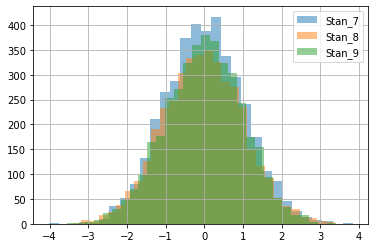

In [33]:
# 1. Implement all the examples
# 2. Use them to generate distributuion for N=F.

from msilib.schema import File
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

F = len("Maciej")

model1 = CmdStanModel(stan_file="code_7.stan")
model2 = CmdStanModel(stan_file="code_8.stan")
model3 = CmdStanModel(stan_file="code_9.stan")

fit1 = model1.sample(data={"N": F})
fit2 = model2.sample(data={"N": F})
fit3 = model3.sample(data={"N": F})

df1 = fit1.draws_pd()
df2 = fit2.draws_pd()
df3 = fit3.draws_pd()

bins = 30
alpha = 0.5

df1["theta"].hist(bins=bins, alpha=alpha)
df2["theta"].hist(bins=bins, alpha=alpha)
df3["theta"].hist(bins=bins, alpha=alpha)
plt.legend(["Stan_7", "Stan_8", "Stan_9"])
plt.show()

fit1.save_csvfiles("samples")
fit2.save_csvfiles("samples")
fit3.save_csvfiles("samples")

Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [1] done pro

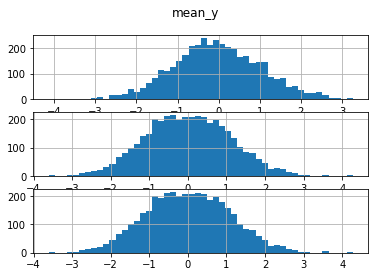

In [35]:
# 1. Implement code_10.stan
# 2. Using generate_quantities() method use samples from previous excercises and and analyze mean of .

F = len("Maciej")
data = {"N": F}

model = CmdStanModel(stan_file="code_10.stan")

previous_samples1 = ["samples/sample1_1.csv", "samples/sample1_2.csv", "samples/sample1_3.csv", "samples/sample1_4.csv"]
previous_samples2 = ["samples/sample2_1.csv", "samples/sample2_2.csv", "samples/sample2_3.csv", "samples/sample2_4.csv"]
previous_samples3 = ["samples/sample3_1.csv", "samples/sample3_2.csv", "samples/sample3_3.csv", "samples/sample3_4.csv"]

fit1 = model.generate_quantities(data=data, mcmc_sample=previous_samples1)
fit2 = model.generate_quantities(data=data, mcmc_sample=previous_samples2)
fit3 = model.generate_quantities(data=data, mcmc_sample=previous_samples3)

df1 = fit1.draws_pd()
df2 = fit2.draws_pd()
df3 = fit3.draws_pd()

bins = 50

plt.subplot(3,1,1)
df1["mean_y"].hist(bins=bins)

plt.subplot(3,1,2)
df2["mean_y"].hist(bins=bins)

plt.subplot(3,1,3)
df3["mean_y"].hist(bins=bins)

plt.suptitle("mean_y")
plt.show()